### Read Data

In [1]:
import pandas as pd

# For most up to date data, go to:
# github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
global_data = pd.read_csv('time_series_covid19_confirmed_global.csv')

global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


### Aggregate Country Counts
Some countries have data for Provinces/States, let's just sum all of those so we have the total country counts


In [2]:
global_data_summed = global_data.groupby('Country/Region').sum()

df = global_data_summed.drop(['Lat', 'Long'], axis=1).reset_index() # Doesn't make sense to keep Lat/Long after dataframe has been summed
df.head()

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,Albania,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,Algeria,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,Andorra,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,Angola,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


### List out all countries

In [3]:
# These are the country names we can pass into our plotting method
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

### Plot Confirmed Cases for Countries over Time
Modify these values to change your graph (make sure to rerun this cell before running plot code)

In [4]:
countries_to_plot = ['US', 'China', 'United Kingdom', 'Germany', 'India']

# US Date format: 'MM/DD/YYYY'
start_date = '01/22/2020'
end_date = '04/03/2020'

Code to plot data

C:\Users\duyen\AppData\Local\Temp\ipykernel_14040\558089243.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  y_values = [int(country_df[col]) for col in x_values]


ValueError: invalid literal for int() with base 10: 'AnhuiBeijingChongqingFujianGansuGuangdongGuangxiGuizhouHainanHebeiHeilongjiangHenanHong KongHubeiHunanInner MongoliaJiangsuJiangxiJilinLiaoningMacauNingxiaQinghaiShaanxiShandongShanghaiShanxiSichuanT

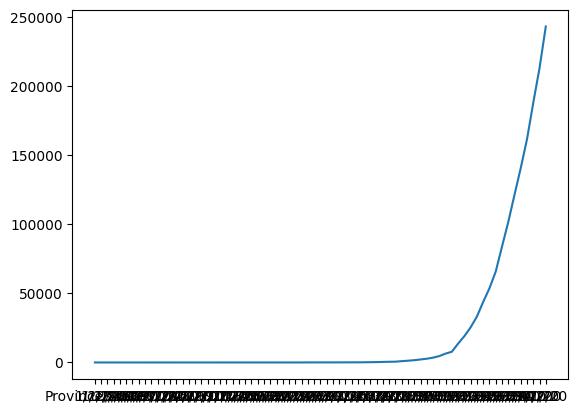

In [5]:
import matplotlib.pyplot as plt
import datetime

def get_index_from_date(date_string):
    FIRST_DATE = datetime.datetime(2020, 1, 22) # Don't modify this value
    
    date_list = [int(x) for x in date_string.split('/')]
    date_object = datetime.datetime(date_list[-1], date_list[0], date_list[1])
    
    return (date_object-FIRST_DATE).days

dates = list(df)[1:]
dates

start_index = get_index_from_date(start_date)

end_index = get_index_from_date(end_date)

x_values = dates[start_index:end_index+1]

for country in countries_to_plot:
    country_df = df[df['Country/Region'] == country]
    y_values = [int(country_df[col]) for col in x_values]
    plt.plot(x_values, y_values, label=country)
    
plt.title('Confirmed Cases Over Time')
skip = max(len(x_values)//5, 1) # Helps ensure we don't add too many date tick marks
plt.xticks(x_values[::skip])
plt.xlabel("Date (MM/DD/YY)")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()